In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import scipy.stats as stats

matplotlib.rcParams['axes.unicode_minus'] = False

matplotlib.rcParams['font.family'] = "AppleGothic"

In [19]:
# Load the uploaded file
file_path = '프로젝트데이터_외국인보유수_포함.csv'
data = pd.read_csv(file_path)

In [20]:
# Display the first few rows of the dataframe
data.head()

,Date,kospi,kosdaq,usdkrw,us_tb_3m,call_r,PPI,CPI,CPI_ratio,IPI,EPI,TOTAL_foreign_own,KOSPI_foreign_own,KOSDAQ_foreign_own
0,2001-01-02,520.95,557.0,1278.0,5.87,5.26,76.37,64.6,0.0,76.45,125.93,22.6,30.4,2.8
1,2001-01-03,521.43,569.0,1270.5,5.69,5.26,76.37,64.6,0.0,76.45,125.93,22.6,30.4,2.8
2,2001-01-04,558.02,615.1,1263.3,5.37,5.28,76.37,64.6,0.0,76.45,125.93,23.0,30.6,3.0
3,2001-01-05,580.85,625.2,1262.5,5.12,5.31,76.37,64.6,0.0,76.45,125.93,23.3,30.8,3.1
4,2001-01-08,586.65,650.0,1263.3,5.19,5.30,76.37,64.6,0.0,76.45,125.93,23.4,30.9,3.2


In [21]:
data.shape

(5790, 14)

In [23]:
data.corr(numeric_only=True)

,kospi,kosdaq,usdkrw,us_tb_3m,call_r,PPI,CPI,CPI_ratio,IPI,EPI,TOTAL_foreign_own,KOSPI_foreign_own,KOSDAQ_foreign_own
kospi,1.000000,0.639522,-0.018182,-0.132496,-0.649587,0.882521,0.919529,-0.031206,0.662772,-0.267887,-0.387782,-0.331632,-0.268689
kosdaq,0.639522,1.000000,0.111762,0.288437,-0.315523,0.416151,0.518125,0.066233,0.135171,-0.236151,-0.333009,-0.151496,-0.158637
usdkrw,-0.018182,0.111762,1.000000,-0.032196,-0.127610,0.234330,0.225692,0.015857,0.214407,0.465548,-0.512913,-0.389427,-0.573539
us_tb_3m,-0.132496,0.288437,-0.032196,1.000000,0.563329,-0.078699,-0.087823,0.068919,-0.175927,0.049538,0.153777,0.209315,0.286009
call_r,-0.649587,-0.315523,-0.127610,0.563329,1.000000,-0.509623,-0.652448,0.131294,-0.256931,0.418309,0.167010,0.078379,0.375226
PPI,0.882521,0.416151,0.234330,-0.078699,-0.509623,1.000000,0.957178,-0.035053,0.862484,0.013938,-0.485244,-0.451988,-0.410405
CPI,0.919529,0.518125,0.225692,-0.087823,-0.652448,0.957178,1.000000,-0.071833,0.704860,-0.207698,-0.437432,-0.358854,-0.384903
CPI_ratio,-0.031206,0.066233,0.015857,0.068919,0.131294,-0.035053,-0.071833,1.000000,0.038303,0.199037,-0.058235,-0.075344,0.031567
IPI,0.662772,0.135171,0.214407,-0.175927,-0.256931,0.862484,0.704860,0.038303,1.000000,0.389982,-0.552086,-0.611003,-0.423274
EPI,-0.267887,-0.236151,0.465548,0.049538,0.418309,0.013938,-0.207698,0.199037,0.389982,1.000000,-0.258875,-0.331930,-0.151770


In [4]:
# Function to binarize series
def binarize_series(series):
    median = series.median()
    binary_series = (series > median).astype(int)
    return binary_series

In [5]:
# Prepare data for analysis
def prepare_data_for_analysis(df):
    df['us_tb_3m_diff'] = df['us_tb_3m'].diff().dropna()
    df['call_r_diff'] = df['call_r'].diff().dropna()
    df = df.dropna()
    df['us_tb_3m_diff_binary'] = binarize_series(df['us_tb_3m_diff'])
    df['call_r_diff_binary'] = binarize_series(df['call_r_diff'])
    return df

In [6]:
# Function to calculate transfer entropy
def CAL_TE_Y_to_X(X, Y):
    M_0 = np.zeros((2, 2, 2))     # p(x_n+1, x_n, y_n)
    M_1 = np.zeros((2, 2))        # p(x_n+1, x_n)
    M_2 = np.zeros((2, 2))        # p(x_n, y_n)
    M_3 = np.zeros(2)             # p(x_n)
    
    for t in range(len(X) - 1):
        M_0[X[t + 1], X[t], Y[t]] += 1
        M_1[X[t + 1], X[t]] += 1
        M_2[X[t], Y[t]] += 1
        M_3[X[t]] += 1

    M_0 = M_0 / M_0.sum()
    M_1 = M_1 / M_1.sum()
    M_2 = M_2 / M_2.sum()
    M_3 = M_3 / M_3.sum()

    TR_Y_to_X = 0
    for x_n1 in range(2):
        for x_n in range(2):
            for y_n in range(2):
                if ((M_0[x_n1, x_n, y_n] * M_3[x_n]) != 0) and (M_2[x_n, y_n] * M_1[x_n1, x_n] != 0):
                    TR_Y_to_X += M_0[x_n1, x_n, y_n] * np.log(M_0[x_n1, x_n, y_n] * M_3[x_n] / M_2[x_n, y_n] / M_1[x_n1, x_n])
                    
    return TR_Y_to_X

In [7]:
# Preparing the data
data_prepared = prepare_data_for_analysis(data)
data_prepared

/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_87859/967350777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['us_tb_3m_diff_binary'] = binarize_series(df['us_tb_3m_diff'])
/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_87859/967350777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_r_diff_binary'] = binarize_series(df['call_r_diff'])


,Date,kospi,kosdaq,usdkrw,us_tb_3m,call_r,PPI,CPI,CPI_ratio,IPI,EPI,TOTAL_foreign_own,KOSPI_foreign_own,KOSDAQ_foreign_own,us_tb_3m_diff,call_r_diff,us_tb_3m_diff_binary,call_r_diff_binary
1,2001-01-03,521.43,569.00,1270.50,5.69,5.26,76.37,64.60,0.0,76.45,125.93,22.6,30.4,2.8,-0.18,0.00,0,0
2,2001-01-04,558.02,615.10,1263.30,5.37,5.28,76.37,64.60,0.0,76.45,125.93,23.0,30.6,3.0,-0.32,0.02,0,1
3,2001-01-05,580.85,625.20,1262.50,5.12,5.31,76.37,64.60,0.0,76.45,125.93,23.3,30.8,3.1,-0.25,0.03,0,1
4,2001-01-08,586.65,650.00,1263.30,5.19,5.30,76.37,64.60,0.0,76.45,125.93,23.4,30.9,3.2,0.07,-0.01,1,0
5,2001-01-09,589.92,678.20,1252.30,5.24,5.28,76.37,64.60,0.0,76.45,125.93,23.3,30.9,3.3,0.05,-0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,2024-06-04,2662.10,845.84,1372.93,5.52,3.48,119.12,114.09,0.1,141.58,131.70,30.6,34.7,9.2,0.00,-0.06,0,0
5786,2024-06-05,2689.50,850.75,1368.48,5.51,3.50,119.12,114.09,0.1,141.58,131.70,30.7,34.8,9.3,-0.01,0.02,0,1
5787,2024-06-07,2722.67,866.18,1378.80,5.52,3.59,119.12,114.09,0.1,141.58,131.70,30.7,34.8,9.3,0.01,0.09,1,1
5788,2024-06-10,2701.17,864.71,1373.60,5.52,3.60,119.12,114.09,0.1,141.58,131.70,30.7,34.8,9.4,0.00,0.01,0,1


In [8]:
# Function to binarize all columns
def binarize_all_columns(df, columns):
    binary_df = df.copy()
    for col in columns:
        binary_df[col] = binarize_series(binary_df[col])
    return binary_df

In [9]:
# Columns to be binarized
columns_to_binarize = ['kospi', 'kosdaq', 'usdkrw', 'us_tb_3m_diff', 'call_r_diff', 'PPI', 'CPI', 'CPI_ratio', 'IPI', 'EPI', 'TOTAL_foreign_own', 'KOSPI_foreign_own', 'KOSDAQ_foreign_own']

# Binarize all necessary columns
data_binarized = binarize_all_columns(data_prepared, columns_to_binarize)

In [10]:
# Calculate transfer entropy for each column pair
te_matrix = np.zeros((len(columns_to_binarize), len(columns_to_binarize)))

for i, col_x in enumerate(columns_to_binarize):
    for j, col_y in enumerate(columns_to_binarize):
        if i != j:
            te_matrix[i, j] = CAL_TE_Y_to_X(data_binarized[col_x].values, data_binarized[col_y].values)

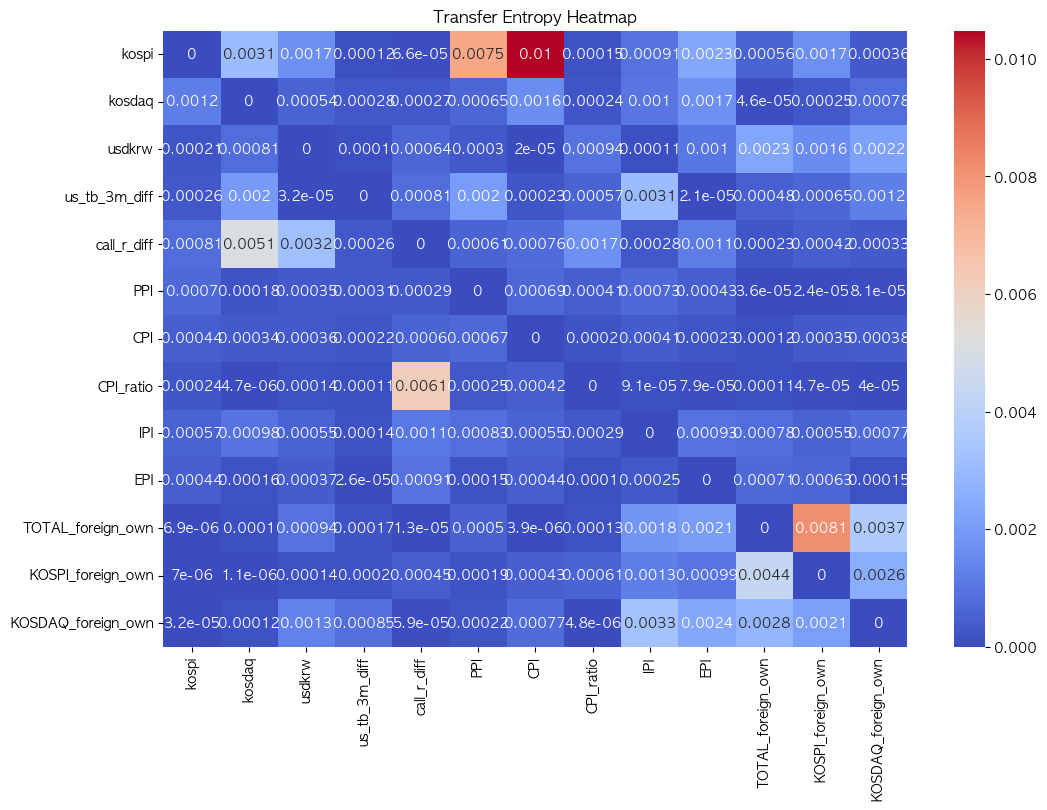

In [11]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(te_matrix, annot=True, xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm')
plt.title('Transfer Entropy Heatmap')
plt.show()

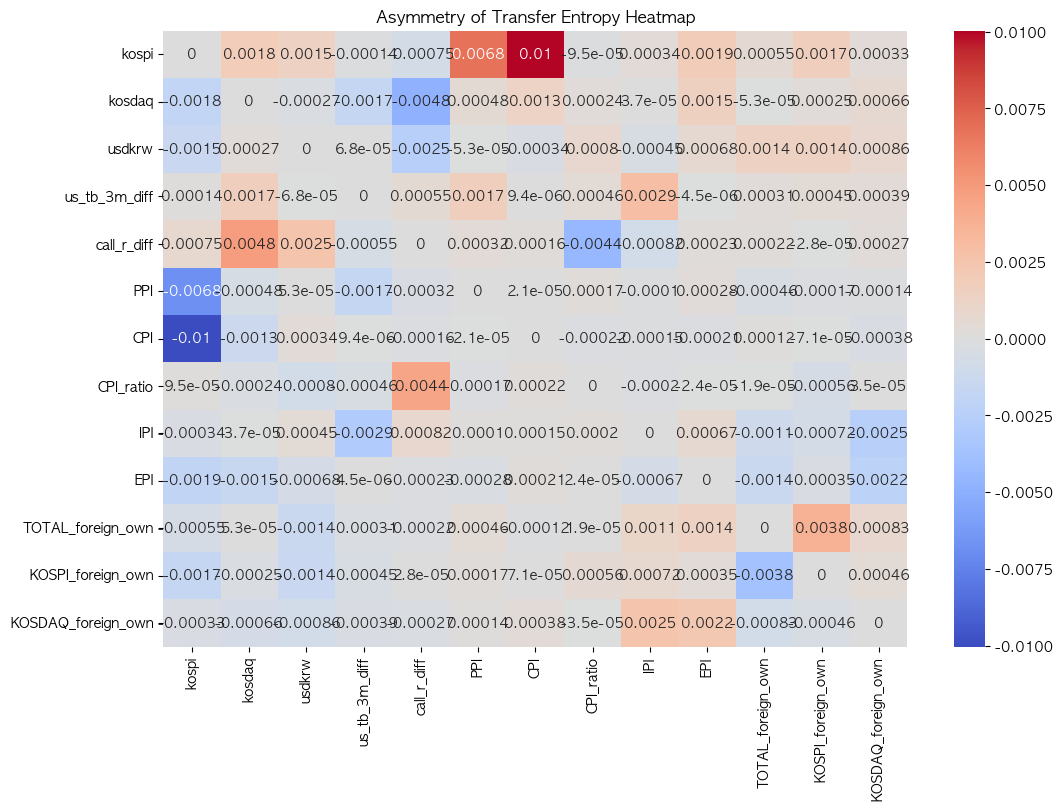

In [12]:
# Calculate asymmetry by comparing symmetrical elements
asymmetry_matrix = te_matrix - te_matrix.T

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(asymmetry_matrix, annot=True, xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm')
plt.title('Asymmetry of Transfer Entropy Heatmap')
plt.show()

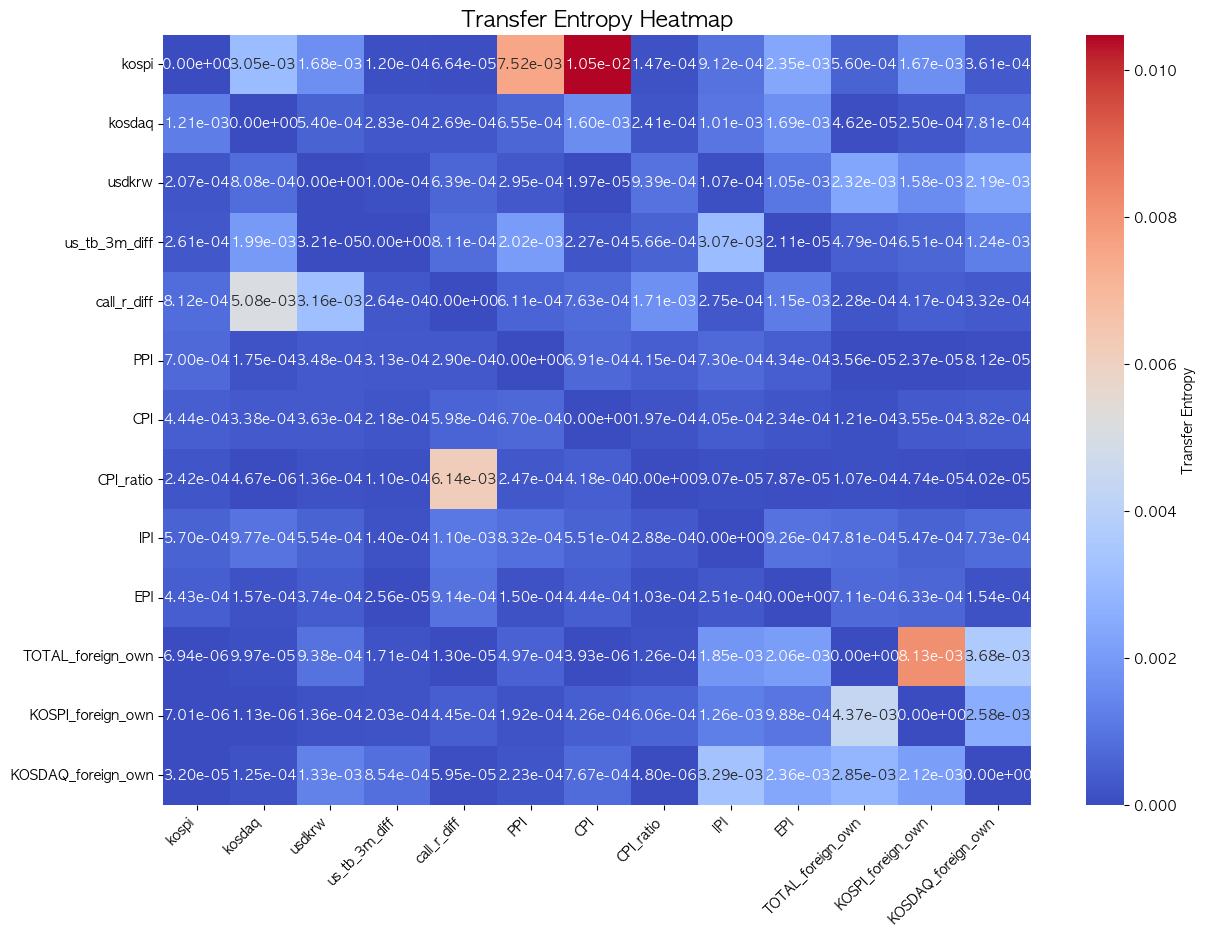

In [13]:
# Plotting the heatmap with enhanced visibility
plt.figure(figsize=(14, 10))
sns.heatmap(te_matrix, annot=True, fmt=".2e", xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm', cbar_kws={'label': 'Transfer Entropy'})
plt.title('Transfer Entropy Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

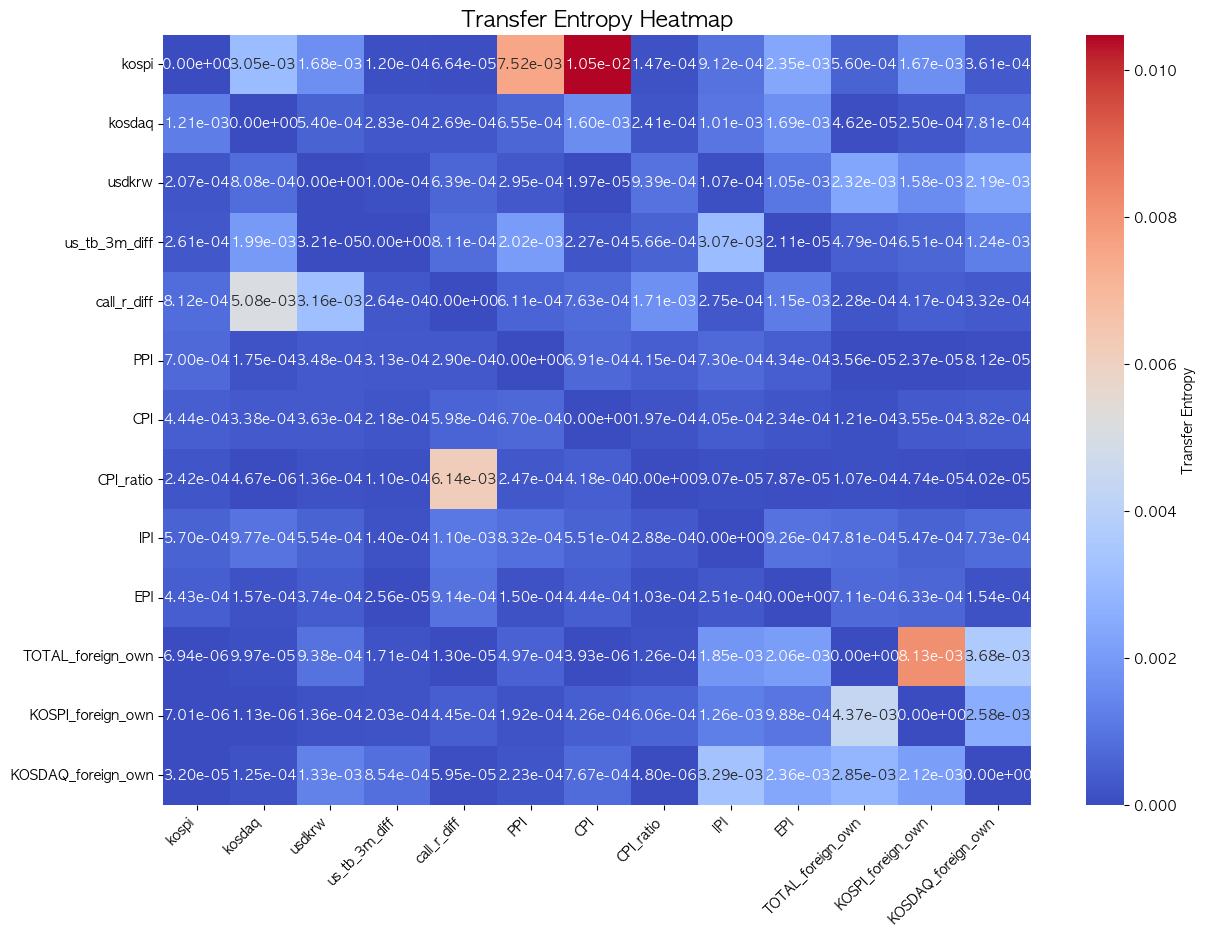

In [14]:
# Plotting the heatmap with enhanced visibility
plt.figure(figsize=(14, 10))
sns.heatmap(te_matrix, annot=True, fmt=".2e", xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm', cbar_kws={'label': 'Transfer Entropy'})
plt.title('Transfer Entropy Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

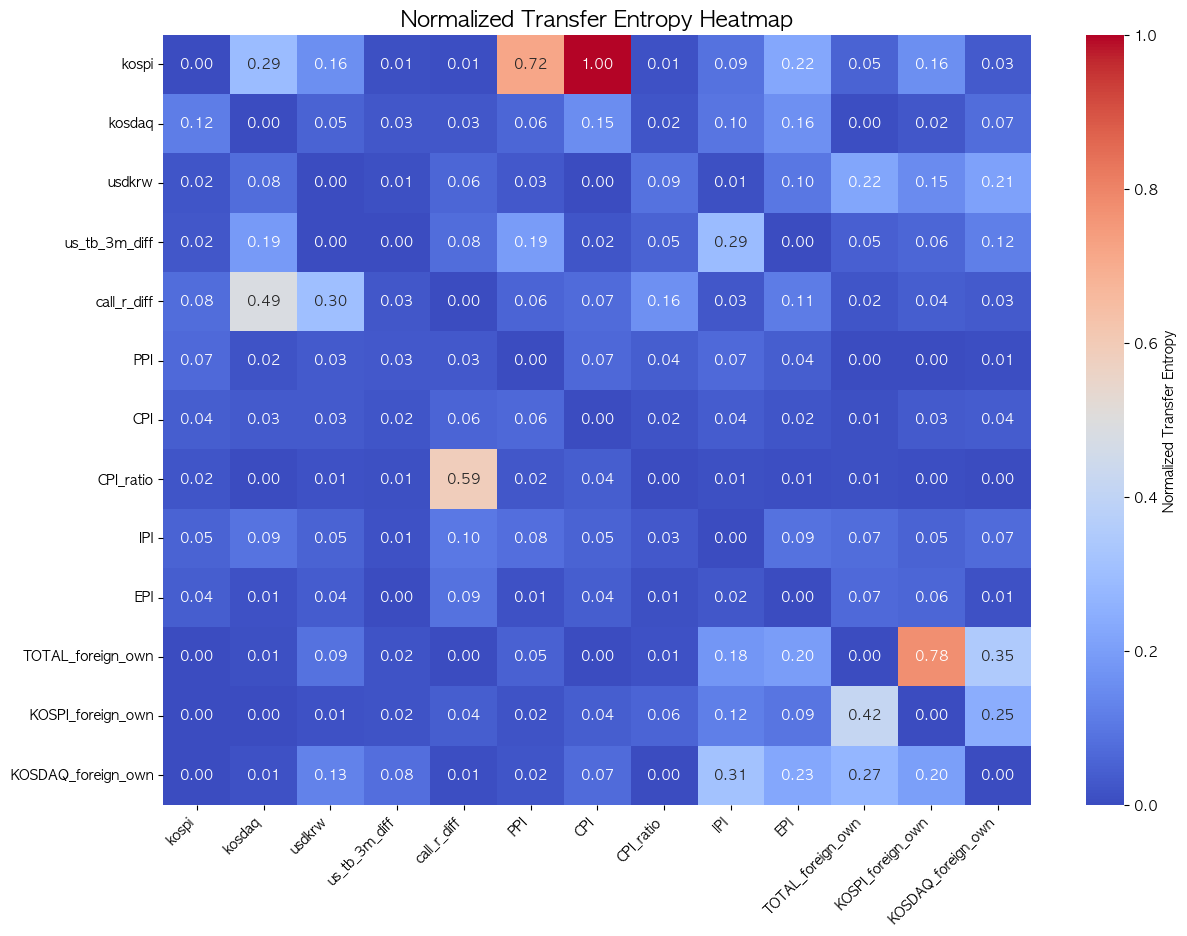

In [15]:
# Normalize the transfer entropy values for better visibility
te_matrix_normalized = te_matrix / np.max(np.abs(te_matrix))

# Plotting the heatmap with enhanced visibility
plt.figure(figsize=(14, 10))
sns.heatmap(te_matrix_normalized, annot=True, fmt=".2f", xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm', cbar_kws={'label': 'Normalized Transfer Entropy'})
plt.title('Normalized Transfer Entropy Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

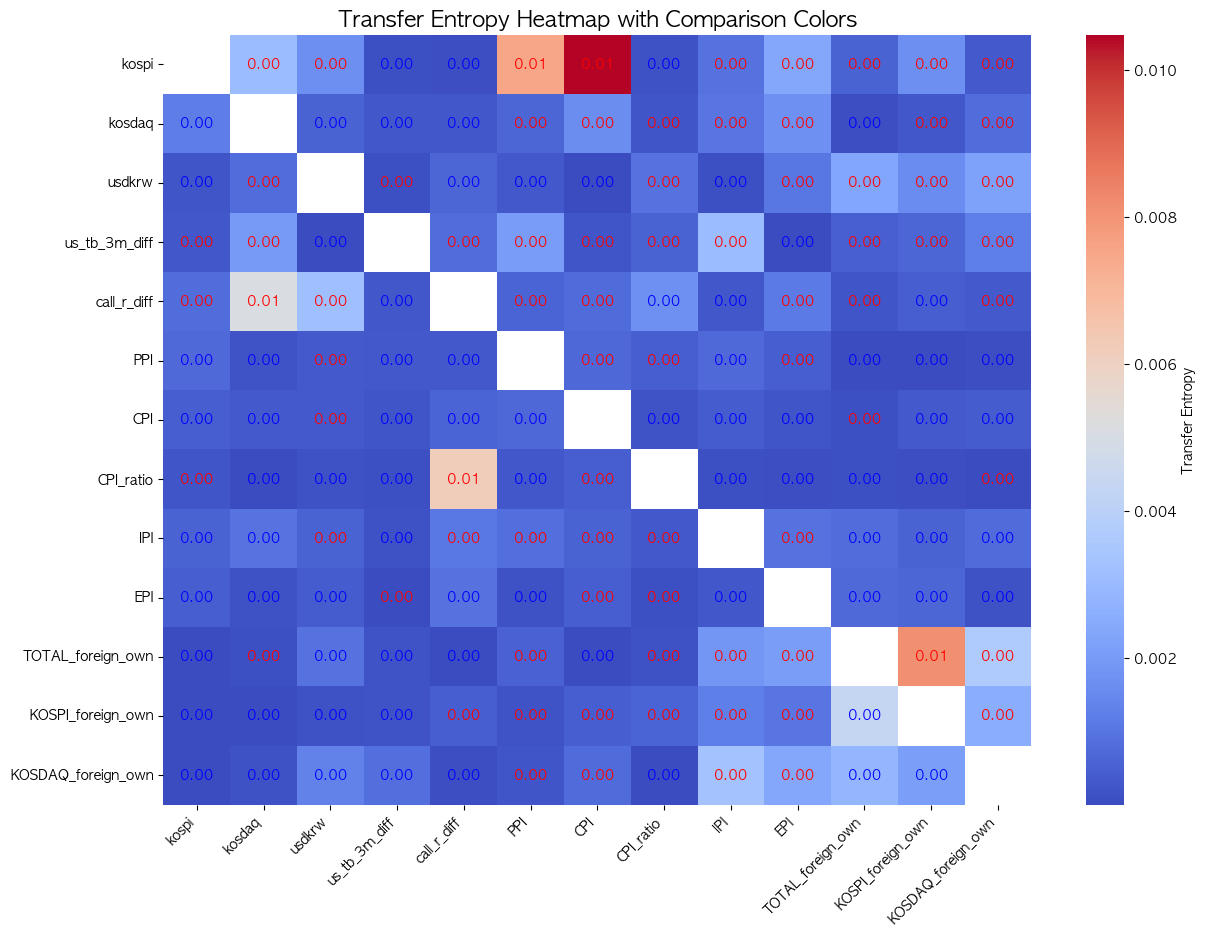

In [16]:
# Create a matrix to hold the colors
color_matrix = np.empty(te_matrix.shape, dtype=str)
color_matrix[:, :] = 'white'  # Default color

# Compare the values in [i,j] and [j,i] and set colors
for i in range(len(columns_to_binarize)):
    for j in range(len(columns_to_binarize)):
        if i != j:
            if te_matrix[i, j] > te_matrix[j, i]:
                color_matrix[i, j] = 'red'
                color_matrix[j, i] = 'blue'
            else:
                color_matrix[i, j] = 'blue'
                color_matrix[j, i] = 'red'

# Plotting the heatmap with enhanced visibility and color coding
plt.figure(figsize=(14, 10))
sns.heatmap(te_matrix, annot=False, xticklabels=columns_to_binarize, yticklabels=columns_to_binarize, cmap='coolwarm', cbar_kws={'label': 'Transfer Entropy'}, mask=np.eye(len(columns_to_binarize)))
for i in range(len(columns_to_binarize)):
    for j in range(len(columns_to_binarize)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, f"{te_matrix[i, j]:.2f}", color=color_matrix[i, j], ha='center', va='center', fontsize=10)
plt.title('Transfer Entropy Heatmap with Comparison Colors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_87859/967350777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['us_tb_3m_diff_binary'] = binarize_series(df['us_tb_3m_diff'])
/var/folders/2x/rgqmkhln4lq6_vy_fb_4rsxm0000gn/T/ipykernel_87859/967350777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_r_diff_binary'] = binarize_series(df['call_r_diff'])


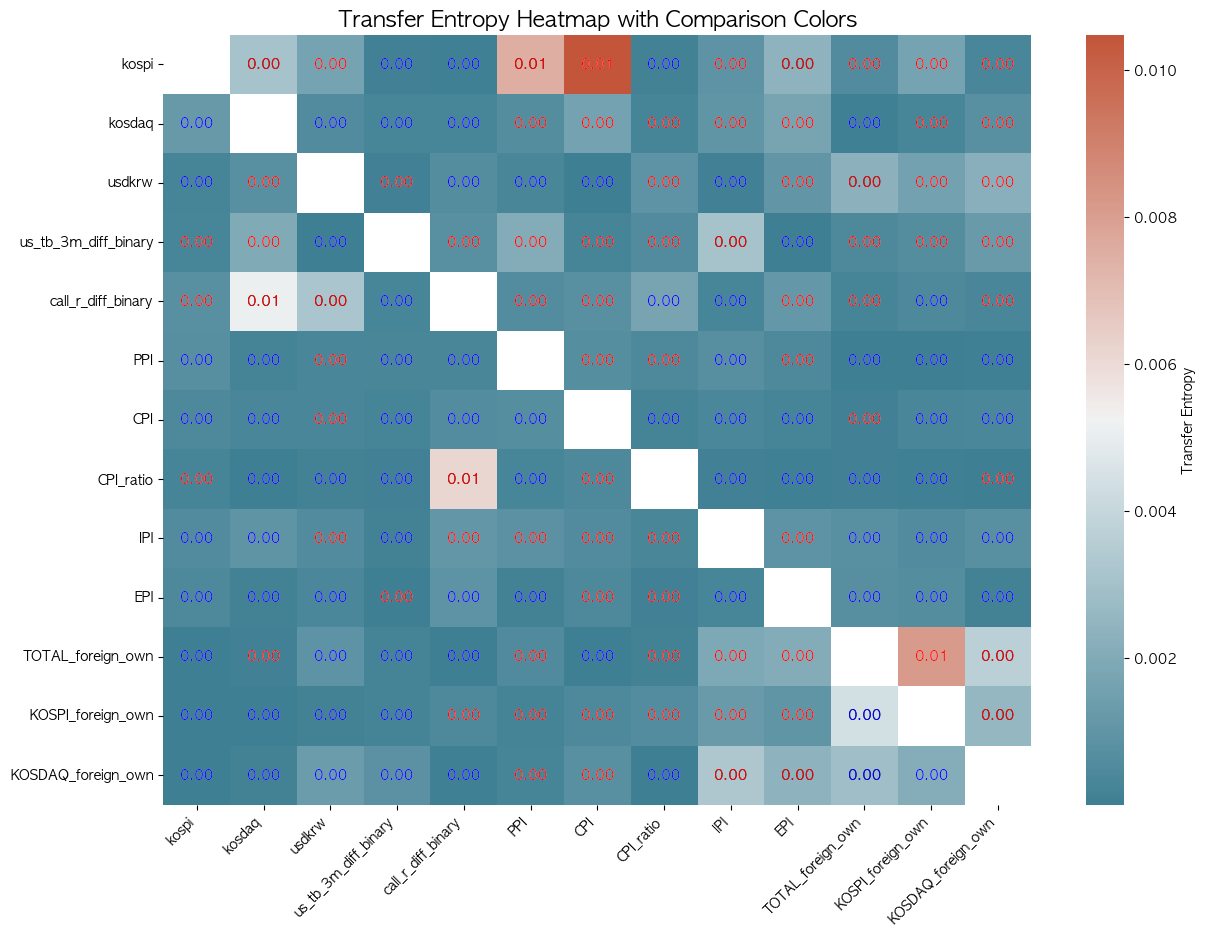

In [17]:
# Preparing the data
data_prepared = prepare_data_for_analysis(data)

# Function to binarize all columns
def binarize_all_columns(df, columns):
    binary_df = df.copy()
    for col in columns:
        binary_df[col] = binarize_series(binary_df[col])
    return binary_df

# Columns to be binarized
columns_to_binarize = ['kospi', 'kosdaq', 'usdkrw', 'us_tb_3m_diff_binary', 'call_r_diff_binary', 'PPI', 'CPI', 'CPI_ratio', 'IPI', 'EPI', 'TOTAL_foreign_own', 'KOSPI_foreign_own', 'KOSDAQ_foreign_own']

# Binarize all necessary columns
data_binarized = binarize_all_columns(data_prepared, columns_to_binarize)

# Calculate transfer entropy for each column pair
te_matrix = np.zeros((len(columns_to_binarize), len(columns_to_binarize)))

for i, col_x in enumerate(columns_to_binarize):
    for j, col_y in enumerate(columns_to_binarize):
        if i != j:
            te_matrix[i, j] = CAL_TE_Y_to_X(data_binarized[col_x].values, data_binarized[col_y].values)

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a mask for the diagonal
mask = np.eye(len(columns_to_binarize), dtype=bool)

# Create a DataFrame for better handling in seaborn
te_df = pd.DataFrame(te_matrix, index=columns_to_binarize, columns=columns_to_binarize)

# Plotting the heatmap with custom colormap
plt.figure(figsize=(14, 10))
sns.heatmap(te_df, annot=True, fmt=".2f", cmap=cmap, mask=mask, cbar_kws={'label': 'Transfer Entropy'})

# Overlaying the text with comparison color
for i in range(len(columns_to_binarize)):
    for j in range(len(columns_to_binarize)):
        if i != j:
            if te_matrix[i, j] > te_matrix[j, i]:
                color = 'red'
            else:
                color = 'blue'
            plt.text(j + 0.5, i + 0.5, f"{te_matrix[i, j]:.2f}", color=color, ha='center', va='center', fontsize=10)

plt.title('Transfer Entropy Heatmap with Comparison Colors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()